In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7

from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [2]:
data = pd.read_csv('data_regression_for_task.csv')

In [3]:
data

,YEAR,MONTH,CONTRAGENT,ARTICLE_CODE,ARTICLE_NAME,ARTICLE_GROUP,SALES,STORE_SALES
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,0.0
...,...,...,...,...,...,...,...,...
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66460.0,212.0
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9080.0,35.0
128352,2018,2,BOSTON BEER CORPORATION,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,0.0,32.0
128353,2018,2,NaN,BC,BEER CREDIT,REF,0.0,-35.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128355 entries, 0 to 128354
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   YEAR           128355 non-null  int64  
 1   MONTH          128355 non-null  int64  
 2   CONTRAGENT     128331 non-null  object 
 3   ARTICLE_CODE   128355 non-null  object 
 4   ARTICLE_NAME   128355 non-null  object 
 5   ARTICLE_GROUP  128354 non-null  object 
 6   SALES          128355 non-null  float64
 7   STORE_SALES    128355 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 7.8+ MB


In [5]:
data['CONTRAGENT'].replace(np.nan, 'NO_CONTRAGENT', inplace=True)
data['ARTICLE_GROUP'].replace(np.nan, 'NO_GROUP', inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128355 entries, 0 to 128354
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   YEAR           128355 non-null  int64  
 1   MONTH          128355 non-null  int64  
 2   CONTRAGENT     128355 non-null  object 
 3   ARTICLE_CODE   128355 non-null  object 
 4   ARTICLE_NAME   128355 non-null  object 
 5   ARTICLE_GROUP  128355 non-null  object 
 6   SALES          128355 non-null  float64
 7   STORE_SALES    128355 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 7.8+ MB


In [7]:
data.sort_values(by=['YEAR', 'MONTH'], inplace=True)

In [8]:
data

,YEAR,MONTH,CONTRAGENT,ARTICLE_CODE,ARTICLE_NAME,ARTICLE_GROUP,SALES,STORE_SALES
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,0.0
...,...,...,...,...,...,...,...,...
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66460.0,212.0
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9080.0,35.0
128352,2018,2,BOSTON BEER CORPORATION,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,0.0,32.0
128353,2018,2,NO_CONTRAGENT,BC,BEER CREDIT,REF,0.0,-35.0


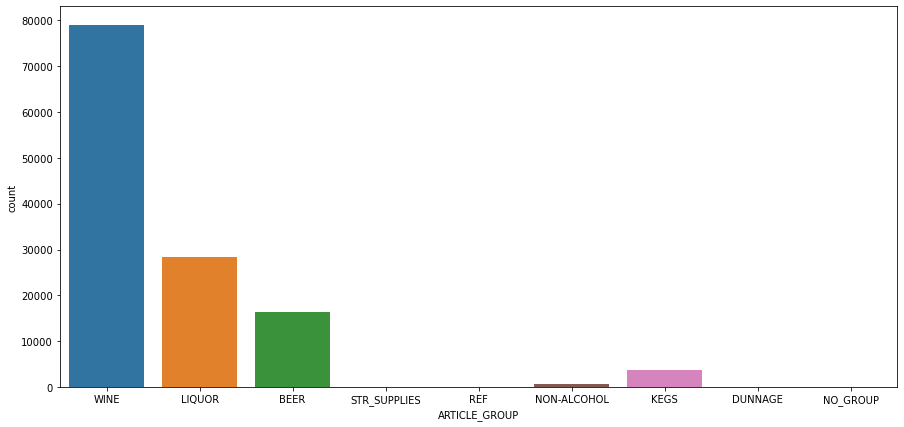

In [9]:
sns.countplot(x='ARTICLE_GROUP', data=data)

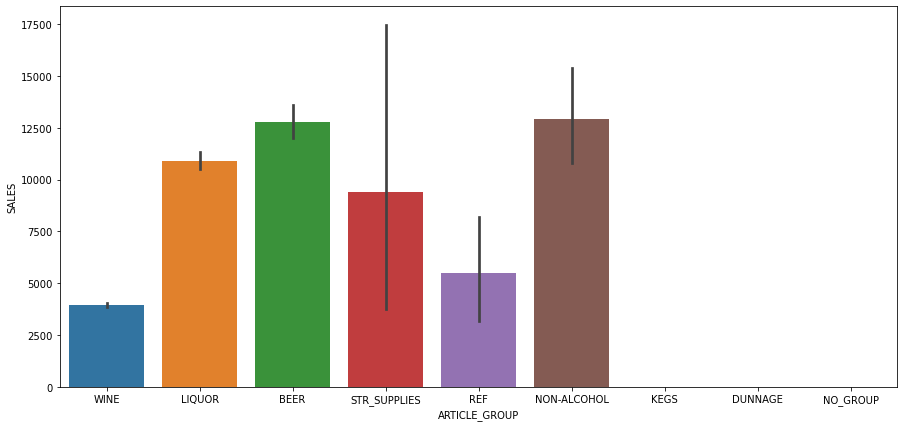

In [10]:
sns.barplot(x='ARTICLE_GROUP', y='SALES', data=data)

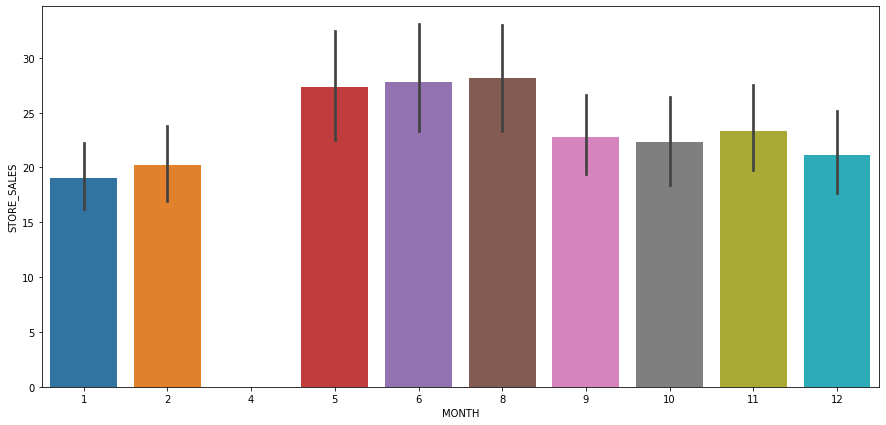

In [11]:
sns.barplot(x='MONTH', y='STORE_SALES', data=data)

In [12]:
data['MONTH'].unique()

array([ 4,  5,  6,  8,  9, 10, 11, 12,  1,  2], dtype=int64)

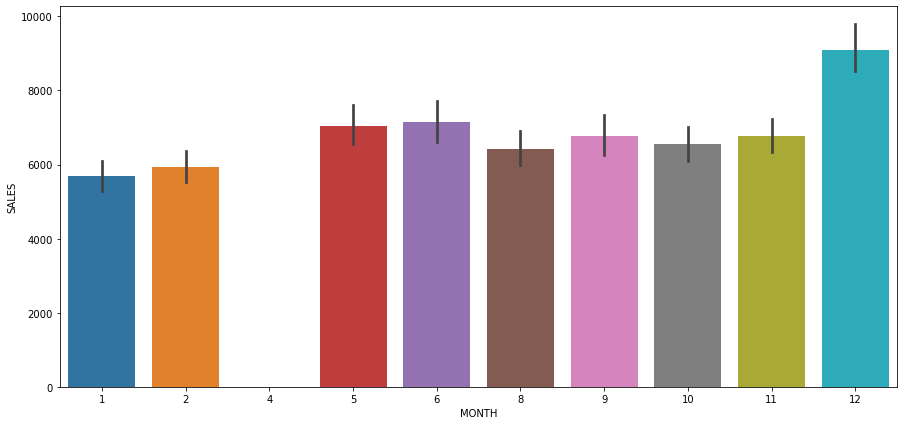

In [13]:
sns.barplot(x='MONTH', y='SALES', data=data)

In [14]:
date_block_num = data.groupby(['YEAR', 'MONTH']).ngroup()
date_block_num.name = 'DATE_BLOCK_NUM'
date_block_num += 1

data = pd.concat([date_block_num, data], axis=1)

In [15]:
data = data[data['MONTH'] != 4]
data.reset_index(drop=True, inplace=True)

## Feature Enginering

In [16]:
def add_lag_sales(df, lags, store=False):
    if store:
        tmp_df = df[['DATE_BLOCK_NUM', 'CONTRAGENT', 'ARTICLE_CODE', 'SALES', 'STORE_SALES']]
    
    else:
        tmp_df = df[['DATE_BLOCK_NUM', 'CONTRAGENT', 'ARTICLE_CODE', 'SALES']]
    
    for i in lags:
        shifted_df = tmp_df.copy()
        
        if store:
            shifted_df.columns = ['DATE_BLOCK_NUM', 'CONTRAGENT', 'ARTICLE_CODE', 
                                  'SALES' + '_LAG_' + str(i), 'STORE_SALES' + '_LAG_' + str(i)]
            
        else:
            shifted_df.columns = ['DATE_BLOCK_NUM', 'CONTRAGENT', 'ARTICLE_CODE', 'SALES' + '_LAG_' + str(i)]
            
        shifted_df['DATE_BLOCK_NUM'] += i
        
        df = pd.merge(df, shifted_df, on=['DATE_BLOCK_NUM', 'CONTRAGENT', 'ARTICLE_CODE'], how='left')
        
    return df

In [17]:
def add_lag_features(df, lags, gb_cols, col):
    grouped_df = data.groupby(gb_cols).agg({'SALES': 'mean'})
    grouped_df.columns = [col]
    grouped_df.reset_index(inplace=True)
    
    df = pd.merge(df, grouped_df, on=gb_cols, how='left')
    
    tmp_df = df[['DATE_BLOCK_NUM', 'CONTRAGENT', 'ARTICLE_CODE', col]]
    
    for i in lags:
        shifted_df = tmp_df.copy()
        shifted_df.columns = ['DATE_BLOCK_NUM', 'CONTRAGENT', 'ARTICLE_CODE', col + '_LAG_' + str(i)]
        shifted_df['DATE_BLOCK_NUM'] += i
        
        df = pd.merge(df, shifted_df, on=['DATE_BLOCK_NUM', 'CONTRAGENT', 'ARTICLE_CODE'], how='left')
        
    df.drop([col], axis=1, inplace=True)
        
    return df

In [18]:
data = add_lag_sales(data, [1, 2, 3])

In [19]:
data = add_lag_features(data, [1, 2, 3], ['DATE_BLOCK_NUM', 'CONTRAGENT'], 'AVG_CONTRAGENT_SALES')
data = add_lag_features(data, [1, 2, 3], ['DATE_BLOCK_NUM', 'ARTICLE_GROUP'], 'AVG_ARTICLE_GROUP_SALES')

In [20]:
data

,DATE_BLOCK_NUM,YEAR,MONTH,CONTRAGENT,ARTICLE_CODE,ARTICLE_NAME,ARTICLE_GROUP,SALES,STORE_SALES,SALES_LAG_1,SALES_LAG_2,SALES_LAG_3,AVG_CONTRAGENT_SALES_LAG_1,AVG_CONTRAGENT_SALES_LAG_2,AVG_CONTRAGENT_SALES_LAG_3,AVG_ARTICLE_GROUP_SALES_LAG_1,AVG_ARTICLE_GROUP_SALES_LAG_2,AVG_ARTICLE_GROUP_SALES_LAG_3
0,2,2017,5,DOPS INC,12644,RARE PINOT NOIR - 750ML,WINE,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2017,5,CONSTANTINE WINES INC,100003,LA CETTO ZINFANDEL - 750ML,WINE,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2017,5,CONSTANTINE WINES INC,100007,LA CETTO CAB SAUV - 750ML,WINE,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2017,5,INTERBALT PRODUCTS CORP,100011,PAPI P/GRIG - 1.5L,WINE,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2017,5,INTERBALT PRODUCTS CORP,100012,PAPI P/GRIG - 750ML,WINE,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123155,10,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66460.0,212.0,60740.0,113370.0,81660.0,14790.745614,25582.085106,20048.132780,9728.371412,16065.863991,12428.722045
123156,10,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9080.0,35.0,7500.0,19250.0,17000.0,1630.000000,3803.500000,3184.782609,9728.371412,16065.863991,12428.722045
123157,10,2018,2,BOSTON BEER CORPORATION,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,0.0,32.0,0.0,0.0,NaN,13718.846154,30620.377358,NaN,0.000000,0.000000,NaN
123158,10,2018,2,NO_CONTRAGENT,BC,BEER CREDIT,REF,0.0,-35.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,3380.000000,5887.142857,9015.714286


In [21]:
data = data[data['DATE_BLOCK_NUM'] > 4]
data.reset_index(drop=True, inplace=True)

In [22]:
data.loc[:, 'CONTRAGENT']    = LabelEncoder().fit_transform(data.loc[:, 'CONTRAGENT'])
data.loc[:, 'ARTICLE_CODE']  = LabelEncoder().fit_transform(data.loc[:, 'ARTICLE_CODE'])
data.loc[:, 'ARTICLE_GROUP'] = LabelEncoder().fit_transform(data.loc[:, 'ARTICLE_GROUP'])

C:\Users\Vlad Molchanov\miniconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [23]:
data = data.drop(['YEAR', 'MONTH', 'ARTICLE_NAME'], axis=1)

In [24]:
data.replace([-np.nan, np.nan], 0, inplace=True)
data.fillna(0, inplace=True)

In [25]:
X = data.drop('SALES', axis=1)
y = data['SALES']

In [26]:
%%time

decision_tree = DecisionTreeRegressor()
decision_tree.fit(X, y)

Wall time: 2.24 s


DecisionTreeRegressor()

In [27]:
decision_tree.feature_importances_

array([1.61866928e-02, 5.48753448e-03, 9.39021034e-03, 5.48537910e-04,
       1.23874458e-02, 2.19144670e-01, 5.27192519e-02, 6.46830408e-01,
       2.97171325e-03, 5.76772092e-03, 1.08848909e-02, 4.35244975e-03,
       1.03704219e-02, 2.95805183e-03])

In [28]:
def plot_feature_importance(fi):
    fig, ax = plt.subplots(figsize=(12, 10))
    
    num_bar = min(len(fi.index), 30)
    ax.barh(np.arange(0, num_bar), fi['importance'][:num_bar], align='center')
    ax.set_yticks(np.arange(0, num_bar))
    ax.set_yticklabels(fi['feature'][:num_bar])

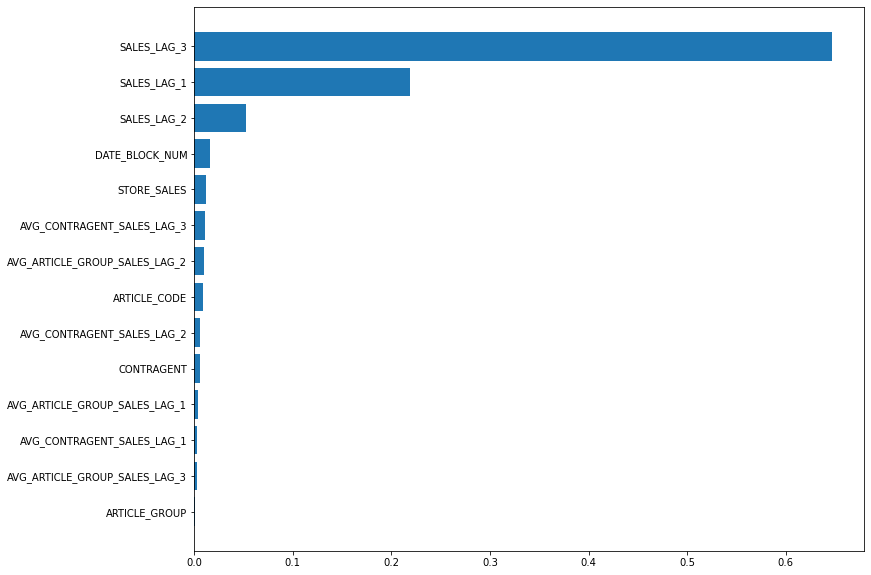

In [29]:
fi = pd.DataFrame({'feature': X.columns, 
                   'importance': decision_tree.feature_importances_}).sort_values(by='importance', ascending=True)

fi = fi.reset_index()

plot_feature_importance(fi)

In [30]:
data = data[['DATE_BLOCK_NUM', 'CONTRAGENT', 'ARTICLE_CODE', 'SALES', 
             'STORE_SALES', 'SALES_LAG_1', 'SALES_LAG_2', 'SALES_LAG_3']]

In [31]:
data

,DATE_BLOCK_NUM,CONTRAGENT,ARTICLE_CODE,SALES,STORE_SALES,SALES_LAG_1,SALES_LAG_2,SALES_LAG_3
0,5,177,1832,160.0,0.0,160.0,320.0,250.0
1,5,231,4,0.0,1.0,0.0,0.0,0.0
2,5,222,5,0.0,2.0,0.0,0.0,0.0
3,5,231,8,80.0,0.0,0.0,80.0,320.0
4,5,76,9,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
82484,10,15,21045,66460.0,212.0,60740.0,113370.0,81660.0
82485,10,59,21046,9080.0,35.0,7500.0,19250.0,17000.0
82486,10,37,21047,0.0,32.0,0.0,0.0,0.0
82487,10,194,21048,0.0,-35.0,0.0,0.0,0.0


In [32]:
def metric(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(y_pred) * 100

## Random Forest

In [33]:
X_train = data[data['DATE_BLOCK_NUM'] != 10].drop(['DATE_BLOCK_NUM', 'SALES'], axis=1)
X_test  = data[data['DATE_BLOCK_NUM'] == 10].drop(['DATE_BLOCK_NUM', 'SALES'], axis=1)

y_train = data[data['DATE_BLOCK_NUM'] != 10]['SALES']
y_test  = data[data['DATE_BLOCK_NUM'] == 10]['SALES']

In [34]:
rf_model = RandomForestRegressor(oob_score=True, n_jobs=-1)

In [35]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True)

In [36]:
rf_model.oob_score_

0.8575851036120561

In [37]:
metric(y_test, rf_model.predict(X_test))

35.58928808940875

## XGBoost

In [38]:
X_train = data[data.DATE_BLOCK_NUM < 9].drop(['DATE_BLOCK_NUM', 'SALES'], axis=1)
X_val   = data[data.DATE_BLOCK_NUM == 9].drop(['DATE_BLOCK_NUM', 'SALES'], axis=1)
X_test  = data[data.DATE_BLOCK_NUM == 10].drop(['DATE_BLOCK_NUM', 'SALES'], axis=1)

y_train = data[data.DATE_BLOCK_NUM < 9]['SALES']
y_val   = data[data.DATE_BLOCK_NUM == 9]['SALES']
y_test  = data[data.DATE_BLOCK_NUM == 10]['SALES']

In [39]:
%%time

xgb_model = xgb.XGBRegressor()

xgb_model.fit(X_train, y_train, 
              eval_metric='mae', 
              eval_set=[(X_train, y_train), (X_val, y_val)],
              verbose=True)

[0]	validation_0-mae:5239.37647	validation_1-mae:3225.78101
[1]	validation_0-mae:3903.24292	validation_1-mae:2503.62329
[2]	validation_0-mae:3109.99072	validation_1-mae:2665.52808
[3]	validation_0-mae:2656.58960	validation_1-mae:3089.18408
[4]	validation_0-mae:2399.36597	validation_1-mae:3566.92041
[5]	validation_0-mae:2266.32983	validation_1-mae:3931.23242
[6]	validation_0-mae:2199.77222	validation_1-mae:4179.37109
[7]	validation_0-mae:2164.41284	validation_1-mae:4342.19482
[8]	validation_0-mae:2136.76147	validation_1-mae:4459.23340
[9]	validation_0-mae:2120.52197	validation_1-mae:4548.27246
[10]	validation_0-mae:2113.77026	validation_1-mae:4601.28467
[11]	validation_0-mae:2115.86597	validation_1-mae:4659.22803
[12]	validation_0-mae:2110.15820	validation_1-mae:4703.54541
[13]	validation_0-mae:2108.65503	validation_1-mae:4725.61328
[14]	validation_0-mae:2105.16260	validation_1-mae:4733.19482
[15]	validation_0-mae:2097.33472	validation_1-mae:4735.11279
[16]	validation_0-mae:2091.70557	v

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
metric(y_test, xgb_model.predict(X_test))

38.32289116349277